In [77]:
# importing modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import statsmodels.api as sm
warnings.filterwarnings('ignore')

In [78]:
df = pd.read_csv('./datasets/corporate_stress_dataset.csv')
dataset = df.copy()
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 30 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   ID                                50000 non-null  int64  
 1   Age                               50000 non-null  int64  
 2   Gender                            50000 non-null  object 
 3   Marital_Status                    50000 non-null  object 
 4   Job_Role                          50000 non-null  object 
 5   Experience_Years                  50000 non-null  int64  
 6   Monthly_Salary_INR                50000 non-null  float64
 7   Working_Hours_per_Week            50000 non-null  int64  
 8   Commute_Time_Hours                50000 non-null  float64
 9   Remote_Work                       50000 non-null  bool   
 10  Stress_Level                      50000 non-null  int64  
 11  Health_Issues                     37459 non-null  object 
 12  Comp

In [79]:
dataset

,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Work_Life_Balance,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,9,2,5,10,38,False,True,True,No,Tier-3
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,9,1,10,9,72,True,True,True,No,Tier-3
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,6,1,1,1,67,False,False,False,Yes,Metro
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,8,10,5,10,98,True,True,False,Yes,Metro
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,3,1,9,2,85,True,False,False,No,Tier-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,43,Female,Widowed,HR,8,34594.10,58,1.66,False,...,4,8,7,3,69,True,True,False,No,Tier-3
49996,49997,45,Male,Single,Analyst,31,117925.92,42,1.58,False,...,10,3,0,4,60,True,True,True,Occasional,Tier-2
49997,49998,43,Female,Divorced,Manager,7,109814.51,49,1.49,True,...,0,0,10,6,56,False,True,False,No,Metro
49998,49999,62,Male,Married,HR,9,74918.42,72,2.64,False,...,10,4,2,8,50,True,False,True,Yes,Tier-2


In [80]:
relevant_columns = [
    "Job_Role", "Experience_Years", "Monthly_Salary_INR", 
    "Work_Life_Balance", "Job_Satisfaction", "Training_Opportunities",
    "Performance_Rating"
]
df_selected = df[relevant_columns]

# mapping for industires (split jobs to relevant industires)
industry_mapping = {
    "Developer": "Technology", "Analyst": "Finance", "Sales": "Business",
    "Doctor": "Healthcare", "Nurse": "Healthcare", "Engineer": "Engineering",
    "Scientist": "Research", "Teacher": "Education", "Professor": "Education",
    "Lawyer": "Law", "Accountant": "Finance", "Marketing Manager": "Business",
    "Consultant": "Consulting", "HR Manager": "Human Resources", "Data Scientist": "Technology",
    "Product Manager": "Technology", "Cybersecurity Analyst": "Technology", "Graphic Designer": "Creative",
    "Journalist": "Media", "Pharmacist": "Healthcare"
}
new_industry_mapping = {
    'Developer': 'Technology',
    'Analyst': 'Finance',
    'Sales': 'Retail',
    'Manager': 'Manufacturing',
    'HR': 'Education',
    'Support': 'Telecommunications'
}

df_selected["Industry"] = df_selected["Job_Role"].map(industry_mapping)
df_selected = df_selected.dropna(subset=["Industry"])
df_selected

,Job_Role,Experience_Years,Monthly_Salary_INR,Work_Life_Balance,Job_Satisfaction,Training_Opportunities,Performance_Rating,Industry
0,Developer,5,102703.08,9,5,False,10,Technology
1,Analyst,20,165583.91,9,10,True,9,Finance
2,Developer,10,38005.39,6,1,False,1,Technology
3,Analyst,26,51127.36,8,5,True,10,Finance
4,Sales,29,174597.45,3,9,True,2,Business
...,...,...,...,...,...,...,...,...
49979,Developer,40,101926.23,6,7,True,6,Technology
49982,Developer,40,96755.52,0,2,True,3,Technology
49987,Developer,35,64348.47,8,7,True,8,Technology
49994,Sales,7,38252.85,1,9,False,5,Business


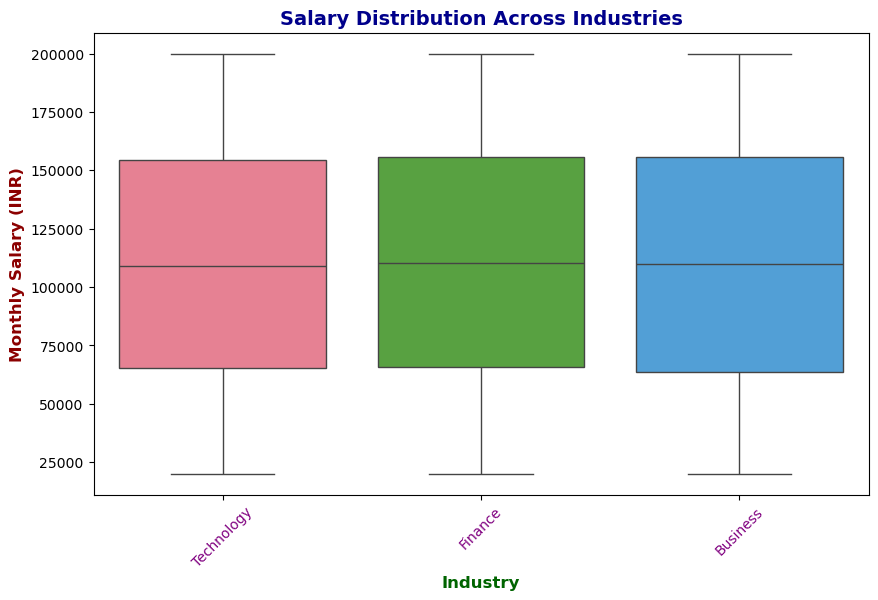

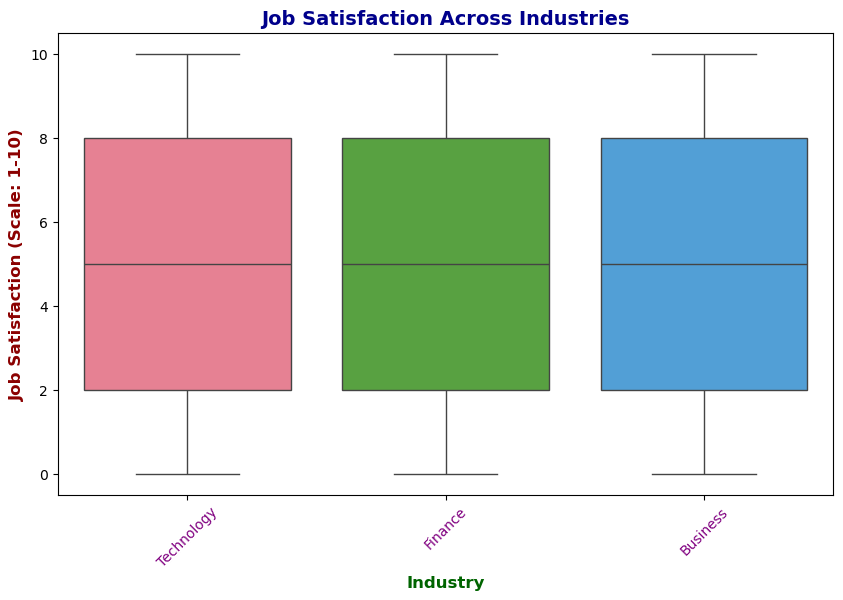

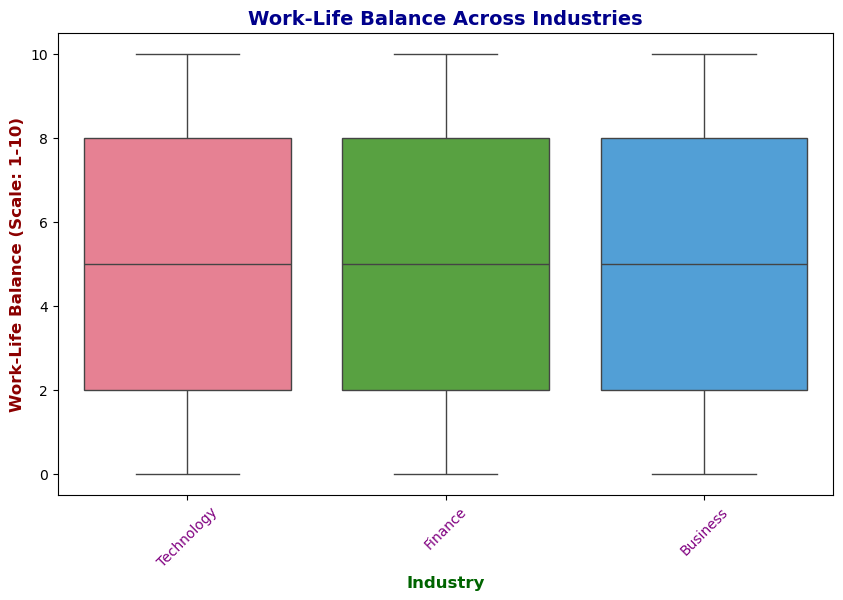

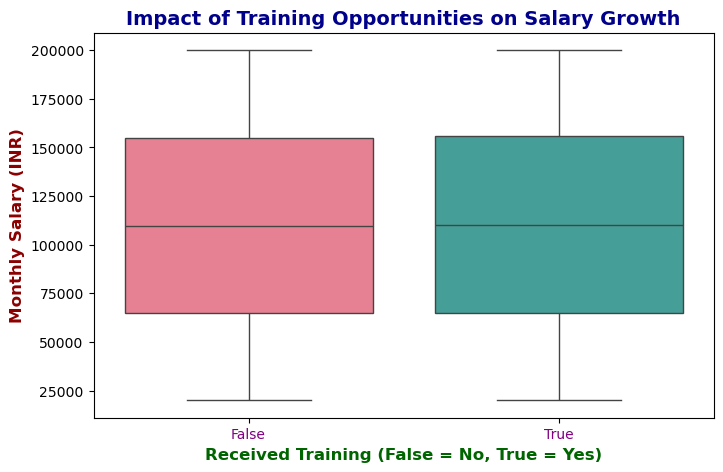

In [81]:
palette = "husl"  # RGB COLORING ISH


plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry", y="Monthly_Salary_INR", data=df_selected, palette=palette)
plt.title("Salary Distribution Across Industries", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Industry", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Monthly Salary (INR)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10, color='purple')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry", y="Job_Satisfaction", data=df_selected, palette=palette)
plt.title("Job Satisfaction Across Industries", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Industry", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Job Satisfaction (Scale: 1-10)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10, color='purple')
plt.show()


plt.figure(figsize=(10, 6))
sns.boxplot(x="Industry", y="Work_Life_Balance", data=df_selected, palette=palette)
plt.title("Work-Life Balance Across Industries", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Industry", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Work-Life Balance (Scale: 1-10)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(rotation=45, fontsize=10, color='purple')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x="Training_Opportunities", y="Monthly_Salary_INR", data=df_selected, palette=palette)
plt.title("Impact of Training Opportunities on Salary Growth", fontsize=14, fontweight='bold', color='darkblue')
plt.xlabel("Received Training (False = No, True = Yes)", fontsize=12, fontweight='bold', color='darkgreen')
plt.ylabel("Monthly Salary (INR)", fontsize=12, fontweight='bold', color='darkred')
plt.xticks(fontsize=10, color='purple')
plt.show()

### Trying to pull analysis from other columns

In [82]:
dataset['Industry'] = dataset['Job_Role'].map(new_industry_mapping)

In [83]:
# Looking at the only col with missing values
dataset['Health_Issues']

# Missing values suggest that they have no health issues

0             NaN
1             NaN
2        Physical
3          Mental
4            Both
           ...   
49995      Mental
49996    Physical
49997      Mental
49998        Both
49999        Both
Name: Health_Issues, Length: 50000, dtype: object

In [84]:
# Label encode health Issues

health_issues_map = {
  'Physical': 1,
  'Mental': 2,
  'Both': 3
}

burnout_map = {
  'No': 0,
  'Yes': 1,
  'Occasional': 2,
}

def encode_health_issues(value):
  if pd.isnull(value):
    return 0 #no health issues
  
  global health_issues_map
  return health_issues_map[value]
 
def encode_burnout(value):
  global burnout_map
  return burnout_map[value]

def encode_true_false(value):
  if value == True:
    return 1
  return 0

dataset['Health_Issues'] = dataset['Health_Issues'].apply(encode_health_issues)
dataset['Burnout_Symptoms'] = dataset['Burnout_Symptoms'].apply(encode_burnout)

bool_cols = ['Training_Opportunities' , 'Gender_Bias_Experienced', 'Discrimination_Experienced']
for col in bool_cols:
  dataset[col] = dataset[col].apply(encode_true_false)

In [85]:
dataset['Health_Issues']

0        0
1        0
2        1
3        2
4        3
        ..
49995    2
49996    1
49997    2
49998    3
49999    3
Name: Health_Issues, Length: 50000, dtype: int64

In [86]:
print(dataset['Job_Role'].unique())
dataset

['Developer' 'Analyst' 'Sales' 'Manager' 'HR' 'Support']


,ID,Age,Gender,Marital_Status,Job_Role,Experience_Years,Monthly_Salary_INR,Working_Hours_per_Week,Commute_Time_Hours,Remote_Work,...,Family_Support_Level,Job_Satisfaction,Performance_Rating,Team_Size,Training_Opportunities,Gender_Bias_Experienced,Discrimination_Experienced,Burnout_Symptoms,Location,Industry
0,1,56,Non-Binary,Widowed,Developer,5,102703.08,44,1.72,True,...,2,5,10,38,0,1,1,0,Tier-3,Technology
1,2,46,Female,Single,Analyst,20,165583.91,54,0.62,True,...,1,10,9,72,1,1,1,0,Tier-3,Finance
2,3,32,Female,Single,Developer,10,38005.39,81,1.22,False,...,1,1,1,67,0,0,0,1,Metro,Technology
3,4,60,Female,Divorced,Analyst,26,51127.36,79,2.03,False,...,10,5,10,98,1,1,0,1,Metro,Finance
4,5,25,Male,Married,Sales,29,174597.45,63,1.45,True,...,1,9,2,85,1,0,0,0,Tier-1,Retail
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,49996,43,Female,Widowed,HR,8,34594.10,58,1.66,False,...,8,7,3,69,1,1,0,0,Tier-3,Education
49996,49997,45,Male,Single,Analyst,31,117925.92,42,1.58,False,...,3,0,4,60,1,1,1,2,Tier-2,Finance
49997,49998,43,Female,Divorced,Manager,7,109814.51,49,1.49,True,...,0,10,6,56,0,1,0,0,Metro,Manufacturing
49998,49999,62,Male,Married,HR,9,74918.42,72,2.64,False,...,4,2,8,50,1,0,1,1,Tier-2,Education


In [87]:
## Goal, group by work life balance, figure out how industries work life balances are affected



